In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import math
# Read data and save into dataframe
dist_df = pd.read_csv('Distributions_data_2016.csv')

In [2]:
# Inspect data
dist_df.shape

(16042, 4)

In [3]:
dist_df.columns

Index(['company', 'percentage', 'demographics', 'job_category'], dtype='object')

In [4]:
dist_df.head()

,company,percentage,demographics,job_category
0,anonymous,0.0,Hispanic_or_Latino,Professionals
1,anonymous,0.0,Hispanic_or_Latino,Professionals
2,anonymous,0.8,Hispanic_or_Latino,Professionals
3,anonymous,1.3,Hispanic_or_Latino,Professionals
4,anonymous,1.6,Hispanic_or_Latino,Professionals


In [5]:
dist_df.tail()

,company,percentage,demographics,job_category
16037,Uber,42.8,Underrepresented_minorities,Sales workers/admin support/technicians and ot...
16038,anonymous,44.4,Underrepresented_minorities,Sales workers/admin support/technicians and ot...
16039,anonymous,47.3,Underrepresented_minorities,Sales workers/admin support/technicians and ot...
16040,anonymous,48.0,Underrepresented_minorities,Sales workers/admin support/technicians and ot...
16041,anonymous,51.6,Underrepresented_minorities,Sales workers/admin support/technicians and ot...


In [6]:
# Look at different demographics surveyed
dist_df['demographics'].unique()

array(['Hispanic_or_Latino', 'White', 'Black_or_African_American',
       'Asian', 'Female_total', 'White_female', 'Asian_female',
       'Black_or_African_American_female', 'Hispanic_or_Latino_female',
       'Women_of_color', 'Underrepresented_minorities_female',
       'People_of_color', 'Underrepresented_minorities'], dtype=object)

In [7]:
# Create df of female percentages across all job categories
distfem_df = dist_df[dist_df['demographics']=='Female_total']
# Create same df with anonymous companies removed
indexNames = distfem_df[distfem_df['company'] == 'anonymous' ].index
# Get rid of anonymous companies
distfem_df2 = distfem_df.drop(indexNames)

In [8]:
# Look at numbers of each demographic group
dist_df['demographics'].value_counts()

Underrepresented_minorities           1234
People_of_color                       1234
Female_total                          1234
Women_of_color                        1234
White_female                          1234
Asian_female                          1234
Hispanic_or_Latino_female             1234
Asian                                 1234
Black_or_African_American             1234
Black_or_African_American_female      1234
Hispanic_or_Latino                    1234
White                                 1234
Underrepresented_minorities_female    1234
Name: demographics, dtype: int64

In [9]:
# Look at unique companies
dist_df['company'].unique()

array(['anonymous', 'eBay', 'Nvidia', 'Uber', 'Square', 'Pinterest',
       'Salesforce', 'PayPal', 'MobileIron', 'Facebook', 'NetApp',
       'Twitter', 'Adobe', 'Google', 'Cisco', 'LinkedIn', 'Apple',
       'Airbnb', 'HPE', 'Intuit', 'Intel', 'HP Inc.', 'Sanmina',
       '23andMe', 'Lyft', 'View'], dtype=object)

In [10]:
# Look at number of data entries per company
dist_df['company'].value_counts()

anonymous     13767
Adobe            91
eBay             91
HPE              91
Lyft             91
Apple            91
Square           91
Uber             91
NetApp           91
Intel            91
LinkedIn         91
Twitter          91
HP Inc.          91
Salesforce       91
Pinterest        91
Google           91
MobileIron       91
Nvidia           91
View             91
PayPal           91
Airbnb           91
23andMe          91
Cisco            91
Sanmina          91
Intuit           91
Facebook         91
Name: company, dtype: int64

In [11]:
# Look at unique job categories
dist_df['job_category'].unique()

array(['Professionals', 'Executives', 'All Workers',
       'Executives-Managers-Professionals', 'Executives and Managers',
       'Managers', 'Sales workers/admin support/technicians and others'],
      dtype=object)

In [12]:
# Look at number of entries per job category
dist_df['job_category'].value_counts()

Executives                                            2301
Executives and Managers                               2301
Professionals                                         2301
All Workers                                           2301
Executives-Managers-Professionals                     2301
Managers                                              2275
Sales workers/admin support/technicians and others    2262
Name: job_category, dtype: int64

In [13]:
# Sort values by company
dist_df.sort_values('company')

,company,percentage,demographics,job_category
7319,23andMe,1.6,Black_or_African_American,Executives-Managers-Professionals
13888,23andMe,10.9,Hispanic_or_Latino,Sales workers/admin support/technicians and ot...
8254,23andMe,0.8,Black_or_African_American_female,Executives-Managers-Professionals
4707,23andMe,6.4,Hispanic_or_Latino,All Workers
4071,23andMe,0.0,Underrepresented_minorities_female,Executives
12529,23andMe,27.7,White_female,Managers
468,23andMe,2.4,Black_or_African_American,Professionals
14970,23andMe,15.2,Asian_female,Sales workers/admin support/technicians and ot...
14644,23andMe,89.1,Female_total,Sales workers/admin support/technicians and ot...
8883,23andMe,35.5,People_of_color,Executives-Managers-Professionals


In [14]:
# Create df for Apple entries only
appledf=dist_df[(dist_df['company']=='Apple')]

In [15]:
# Inspect Apple dataframe
appledf.head()

,company,percentage,demographics,job_category
104,Apple,5.1,Hispanic_or_Latino,Professionals
257,Apple,50.2,White,Professionals
422,Apple,1.7,Black_or_African_American,Professionals
639,Apple,41.5,Asian,Professionals
770,Apple,25.5,Female_total,Professionals


In [16]:
# Singling out the professional job category in Apple df
apple_professionals_df = appledf[appledf['job_category']=='Professionals']

In [17]:
# Inspecting Apple Professionals df
apple_professionals_df.head(13)

,company,percentage,demographics,job_category
104,Apple,5.1,Hispanic_or_Latino,Professionals
257,Apple,50.2,White,Professionals
422,Apple,1.7,Black_or_African_American,Professionals
639,Apple,41.5,Asian,Professionals
770,Apple,25.5,Female_total,Professionals
953,Apple,11.4,White_female,Professionals
1138,Apple,11.4,Asian_female,Professionals
1316,Apple,0.5,Black_or_African_American_female,Professionals
1511,Apple,1.6,Hispanic_or_Latino_female,Professionals
1658,Apple,14.1,Women_of_color,Professionals


In [18]:
# Looking at average percentages of female workers in various job categories
distfem_df.groupby('job_category')['percentage'].mean()

job_category
All Workers                                           31.826554
Executives                                            19.292090
Executives and Managers                               28.077401
Executives-Managers-Professionals                     29.830508
Managers                                              30.371429
Professionals                                         31.001130
Sales workers/admin support/technicians and others    40.620115
Name: percentage, dtype: float64

In [19]:
# Looking at average percentages of female workers in various companies
distfem_df.groupby('company')['percentage'].mean()

company
23andMe       51.585714
Adobe         30.800000
Airbnb        41.742857
Apple         27.085714
Cisco         25.042857
Facebook      33.314286
Google        31.214286
HP Inc.       29.514286
HPE           29.928571
Intel         23.185714
Intuit        40.928571
LinkedIn      39.585714
Lyft          37.671429
MobileIron    26.000000
NetApp        23.971429
Nvidia        19.285714
PayPal        38.971429
Pinterest     39.542857
Salesforce    30.628571
Sanmina       29.900000
Square        34.400000
Twitter       36.228571
Uber          30.100000
View          15.185714
anonymous     29.795940
eBay          36.171429
Name: percentage, dtype: float64

In [20]:
# Showing mean, min and max percentages of female workers in various companies
distfem_df.groupby('company')['percentage'].agg(['mean','min','max'])

,mean,min,max
company,,,
23andMe,51.585714,42.0,89.1
Adobe,30.800000,19.4,34.7
Airbnb,41.742857,29.9,55.9
Apple,27.085714,18.7,34.1
Cisco,25.042857,20.5,31.7
Facebook,33.314286,28.0,53.5
Google,31.214286,12.9,51.7
HP Inc.,29.514286,24.8,33.5
HPE,29.928571,17.2,35.9


In [21]:
# Adding ranges between max and min percentages as a separate column
distfem_summary=distfem_df.groupby('company')['percentage'].agg(['mean','min','max'])
distfem_summary['ci']=distfem_summary['max']-distfem_summary['min']

In [22]:
distfem_summary

,mean,min,max,ci
company,,,,
23andMe,51.585714,42.0,89.1,47.1
Adobe,30.800000,19.4,34.7,15.3
Airbnb,41.742857,29.9,55.9,26.0
Apple,27.085714,18.7,34.1,15.4
Cisco,25.042857,20.5,31.7,11.2
Facebook,33.314286,28.0,53.5,25.5
Google,31.214286,12.9,51.7,38.8
HP Inc.,29.514286,24.8,33.5,8.7
HPE,29.928571,17.2,35.9,18.7


<ErrorbarContainer object of 3 artists>

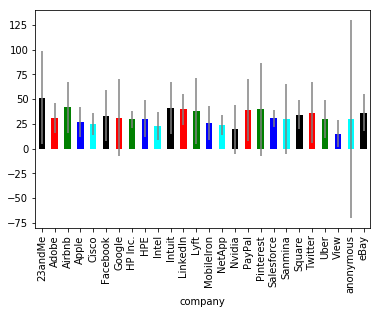

In [23]:
# Creating bar chart with error bar out of above data
distfem_summary['mean'].plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan'])
plt.errorbar(range(distfem_summary.shape[0]), 
             y=distfem_summary['mean'],
             yerr=distfem_summary['ci'], 
             fmt="none", c="gray")

In [24]:
# Create dataframe of female percentages across all workers across all companies
distfemAW_df2 = distfem_df2[distfem_df2['job_category']=='All Workers']
distfemAW_df2

,company,percentage,demographics,job_category
5311,View,17.0,Female_total,All Workers
5313,Nvidia,17.2,Female_total,All Workers
5354,NetApp,24.0,Female_total,All Workers
5373,Intel,26.0,Female_total,All Workers
5376,Cisco,26.2,Female_total,All Workers
5398,Google,29.2,Female_total,All Workers
5400,Uber,29.5,Female_total,All Workers
5408,Apple,30.7,Female_total,All Workers
5409,MobileIron,30.8,Female_total,All Workers
5412,HP Inc.,31.0,Female_total,All Workers


In [34]:
# Create figure for companies vs female percentages across all workers
fig = px.bar(y=distfemAW_df2['percentage'], x=distfemAW_df2['company'], text=distfemAW_df2['percentage'],)
fig.update_layout(title='Female percentages at tech companies across all job categories',
                   xaxis_title='Company',
                   yaxis_title='Percentage of women',
                   font=dict(
                   family="Courier new, monospace",
                   size=10,
                   color="Black"
                ))
display(fig)

In [32]:
# Create figure for companies vs female percentages across all job categories
fig = px.bar(y=distfem_df2['percentage'], x=distfem_df2['company'], color = distfem_df2['job_category'],text = distfem_df2['percentage'])
fig.update_layout(title='Female percentages at tech companies across job categories',
                   xaxis_title='Company',
                   yaxis_title='Percentage of women',
                   font=dict(
                   family="Courier new, monospace",
                   size=10,
                   color="Black"
                ))
display(fig)